# # Given to us:

In [77]:
lr = 0.5
epoch = 1000
hid_bias = 0.35
out_bias = 0.6
inputs = [0.05,0.1] # x1 and x2
real_outputs = [0.01,0.99] # y1 and y2
hid_weights = ([[0.15,0.2],
                   [0.25,0.3]])
out_weights = ([[0.4,0.45],
                   [0.5,0.55]])

# # Sigmoid Definition

In [78]:
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

# # Feedforward planning

In [79]:
# def feedf:
# h1 = w1*x1 + w2*x2 + bias1
# h2 = w3*x3 + w4*x4 + bias1
# h = np.dot(weights_hidden,inputs)+hidden_bias
# h_activate = sigmoid (h)
# o = np.dot(output_weights,h_activate)+output_bias
# o_activate = sigmoid(o)

In [80]:
# hidden layer
# h1 = hid_weights[0][0] * inputs[0] + hid_weights[0][1] * inputs[1] + hid_bias
# h2 = hid_weights[1][0] * inputs[0] + hid_weights[1][1] * inputs[1] + hid_bias
h = np.dot(hid_weights,inputs) + hid_bias # same as h = [h1, h2]
h_activate = sigmoid(h)
# output layer
o = np.dot(out_weights,h_activate) + out_bias
o_activate = sigmoid(o)

# # Error Calculation

In [81]:
 # Error
 MSE = np.square(np.subtract(real_outputs,o_activate)).mean()
 # Mean accuracy
 Merr = np.divide(np.abs(np.subtract(real_outputs,o_activate)),real_outputs).mean()
 Macc = 100 - Merr

# ***Backpropagation***

In [83]:
# Assigning weights w5 to w8
# ****************************************************************************
nw2 = sum(out_weights,[]) 
for i in range(len(nw2)): 
  j=i+1 #weight number
  if(j%2==1):
     d3 = h_activate[0]
  else: 
    d3 = h_activate[1]
  if((j%4==1)or(j%4==2)):
     d1 = o_activate[0]-real_outputs[0]
     d2 = o_activate[0]*(1-o_activate[0])
  elif((j%4==3)or(j%4==0)):
     d1 = o_activate[1]-real_outputs[1]
     d2 = o_activate[1]*(1-o_activate[1])
  d = d1*d2*d3
  nw2[i] = sum(out_weights,[])[i] - lr * d  # updating weights
  i = i + 1
print(nw2,end=' ')
# *************************************************************************

# Assigning weights w5 to w8
# ****************************************************************************
nw1 = sum(hid_weights,[]) 
for i in range(len(nw1)): 
  j=i+1 #weight number
  if(j%2==1):
     D3 = inputs[0]
  else: 
    D3 = inputs[1]
  if((j%4==1)or(j%4==2)):
     d1 = o_activate[0]-real_outputs[0]
     d2 = o_activate[0]*(1-o_activate[0])
     D1 = d1*d2*out_weights[0][0] + d1*d2*out_weights[1][0]
     D2 = h_activate[0]*(1-h_activate[0])
  elif((j%4==3)or(j%4==0)):
     d1 = o_activate[1]-real_outputs[1]
     d2 = o_activate[1]*(1-o_activate[1])
     D1 = d1*d2*out_weights[0][1] + d1*d2*out_weights[1][1]
     D2 = h_activate[1]*(1-h_activate[1])
  D = D1*D2*D3
  nw1[i] = sum(hid_weights,[])[i] - lr * D  # updating weights
  i = i + 1
print('')
print(nw1,end=' ')

[0.35891647971788465, 0.4086661860762334, 0.5113012702387375, 0.5613701211079891] 
[0.1492480544762126, 0.19849610895242517, 0.25022917367198544, 0.30045834734397087] 

# # Integrating the modules and iterating the entire process

In [97]:
epoch = 1000
lr = 0.5
epoch = 1000
hid_bias = 0.35
out_bias = 0.6
inputs = [0.05,0.1] # x1 and x2
real_outputs = [0.01,0.99] # y1 and y2
hid_weights = ([[0.15,0.2],
                   [0.25,0.3]])
out_weights = ([[0.4,0.45],
                   [0.5,0.55]])

while (epoch>0):
  # feedf:
  # hidden layer
  h1 = hid_weights[0][0] * inputs[0] + hid_weights[0][1] * inputs[1] + hid_bias
  h2 = hid_weights[1][0] * inputs[0] + hid_weights[1][1] * inputs[1] + hid_bias
  h = np.dot(hid_weights,inputs) + hid_bias # same as h = [h1, h2]
  h_activate = sigmoid(h)
  # output layer
  o = np.dot(out_weights,h_activate) + out_bias
  o_activate = sigmoid(o) 
  
  # Error
  MSE = np.square(np.subtract(real_outputs,o_activate)).mean()
  # Mean accuracy
  Merr = np.divide(np.abs(np.subtract(real_outputs,o_activate)),real_outputs).mean()
  Macc = 100 - Merr

  # Backpropagation
  nw2 = sum(out_weights,[]) 
  for i in range(len(nw2)): 
    j=i+1 #weight number
    if(j%2==1):
      d3 = h_activate[0]
    else: 
      d3 = h_activate[1]
    if((j%4==1)or(j%4==2)):
      d1 = o_activate[0]-real_outputs[0]
      d2 = o_activate[0]*(1-o_activate[0])
    elif((j%4==3)or(j%4==0)):
      d1 = o_activate[1]-real_outputs[1]
      d2 = o_activate[1]*(1-o_activate[1])
    d = d1*d2*d3
    nw2[i] = sum(out_weights,[])[i] - lr * d  # updating weights
    i = i + 1
  out_weights = (np.array(nw2).reshape(2,2)).tolist()
  nw1 = sum(hid_weights,[]) 
  for i in range(len(nw1)): 
    j=i+1 #weight number
    if(j%2==1):
      D3 = inputs[0]
    else: 
      D3 = inputs[1]
    if((j%4==1)or(j%4==2)):
      d1 = o_activate[0]-real_outputs[0]
      d2 = o_activate[0]*(1-o_activate[0])
      D1 = d1*d2*out_weights[0][0] + d1*d2*out_weights[1][0]
      D2 = h_activate[0]*(1-h_activate[0])
    elif((j%4==3)or(j%4==0)):
      d1 = o_activate[1]-real_outputs[1]
      d2 = o_activate[1]*(1-o_activate[1])
      D1 = d1*d2*out_weights[0][1] + d1*d2*out_weights[1][1]
      D2 = h_activate[1]*(1-h_activate[1])
    D = D1*D2*D3
    nw1[i] = sum(hid_weights,[])[i] - lr * D  # updating weights
    i = i + 1
  hid_weights = (np.array(nw1).reshape(2,2)).tolist()

  epoch = epoch - 1
# end of while loop

# # Feed-forwarding with the latest weights

In [98]:
# hidden layer
# h1 = hid_weights[0][0] * inputs[0] + hid_weights[0][1] * inputs[1] + hid_bias
# h2 = hid_weights[1][0] * inputs[0] + hid_weights[1][1] * inputs[1] + hid_bias
h = np.dot(hid_weights,inputs) + hid_bias # same as h = [h1, h2]
h_activate = sigmoid(h)
# output layer
o = np.dot(out_weights,h_activate) + out_bias
o_activate = sigmoid(o)

In [90]:
o_activate

array([0.04491871, 0.95660654])

# # Calculating the error

In [88]:
 # Error
 MSE = np.square(np.subtract(real_outputs,o_activate)).mean()
 # Mean accuracy
 Merr = np.divide(np.abs(np.subtract(real_outputs,o_activate)),real_outputs).mean()
 Macc = 100 - Merr

In [92]:
print(MSE)
print(Macc)

0.0011686989991325772
98.23604790004929


In [93]:
# Thus, error has been significantly reduced and accuracy has improved to >98%

In [ ]:
# Formulae used for calculations:
# (i) In feed-forwarding: 
# Σxiwi + hidden_bias = hidden output  # layer 1
# Σxjwj + output_bias = output (calculated) #layer 2

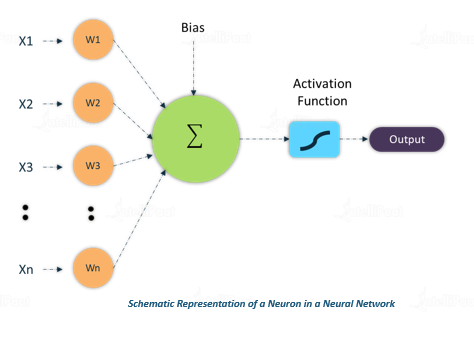

In [ ]:
# Activation Function used: Sigmoid:

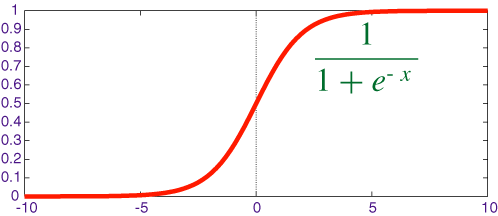

In [94]:
# (ii) In finding error:

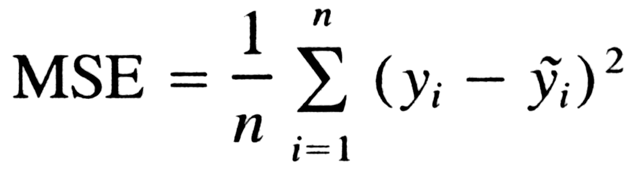

In [ ]:
# In backpropagation:

# Since we need to reassign weights, we need to calculate the error in output with respect to weights

a) For Layer 2:

Error in w1  is calculated as: dE/dw = dE/dh1_out + dh_out/dhin + dh_in/dw
d1 = observed output - actual output

= o_activate[0]-real_outputs[o] 

d2 = o_activate[0](1 - o_activate[0])

d3 = input = h_activate[0]

Net error d = d1 *d2* d3

--> nw5 = w5 - 0.5(=lr) X d    # Reassigning/Correcting weights

Likewise, w6, w7 and w8 has been corrected/updated

b) For layer 1 (hidden):

Error in w1  is calculated as: 
dE/dw = dE/dh1_out + dh_out/dhin + dh_in/dw

D1 = dE/dh1_out = dE1/dh1_out + dE2/dh1_out

= d1 X d2 X w5 + d1 X d2 X w7 **

D2 = h_activate[0]*(1-h_activate[0])

D3 = input[0]

Net error D = D1 * D2 * D3

Therefore D = (d1 X d2 X w5 + d1 X d2 X w7) X (h_activate[0]*
(1-h_activate[0])) X (input[0])

--> nw1 = w1 - 0.5 X D    # Reassigning/Correcting weights

Likewise, w2, w3 and w4 has been corrected/updated

# A diagrammatic representation of the neural netweork used here:

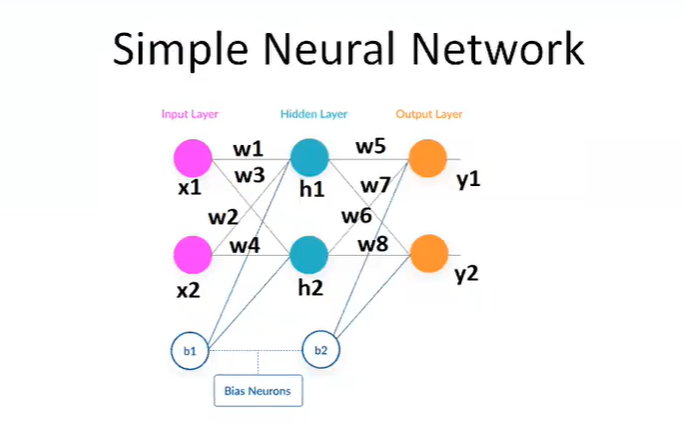

# REFERENCE: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/